In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# load dataset
df = pd.read_csv('movie_info.csv')

<AxesSubplot:xlabel='Year', ylabel='Ratings'>

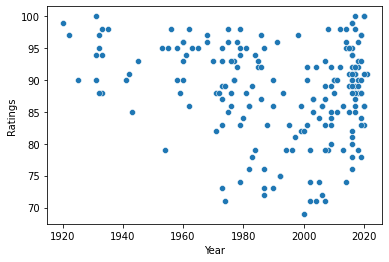

In [3]:
# ratings over time
sns.scatterplot(data=df, x="Year", y="Ratings")



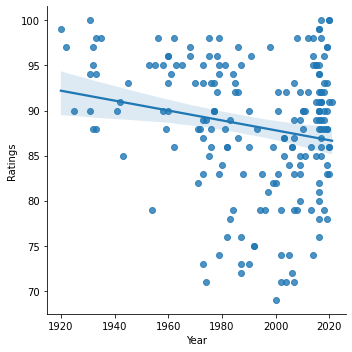

In [4]:
# line of best fit included
sns.lmplot(data=df, x="Year", y="Ratings")

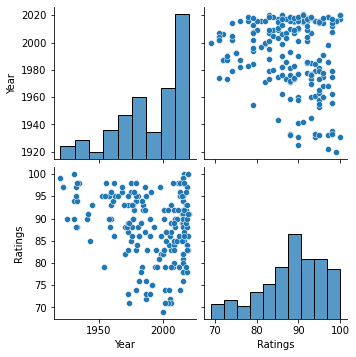

In [5]:
# create a histogram for each variable and a scatterplot for each pair of variables
# broad overview is useful
sns.pairplot(df.loc[:, df.columns!='Year_Ratings'])

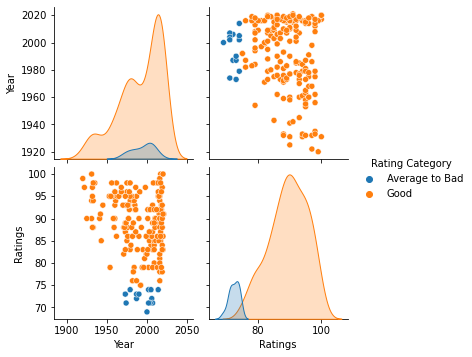

In [6]:
#Need to categorise years
# create a list of our conditions
conditions = [
    (df['Year'] >= 1920) & (df['Year'] < 1930),
    (df['Year'] >= 1930) & (df['Year'] < 1940),
    (df['Year'] >= 1940) & (df['Year'] < 1950),
    (df['Year'] >= 1950) & (df['Year'] < 1960),
    (df['Year'] >= 1960) & (df['Year'] < 1970),
    (df['Year'] >= 1970) & (df['Year'] < 1980),
    (df['Year'] >= 1980) & (df['Year'] < 1990),
    (df['Year'] >= 1990) & (df['Year'] < 2000),
    (df['Year'] >= 2000) & (df['Year'] < 2010),
    (df['Year'] >= 2010) & (df['Year'] < 2020), 
    (df['Year'] > 2020)
    ]

# create a list of the values we want to assign for each condition
values = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Decade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

#Need to categorise ratings
# create a list of our conditions
conditions = [
    (df['Ratings'] >= 0) & (df['Ratings'] < 10),
    (df['Ratings'] >= 10) & (df['Ratings'] < 20),
    (df['Ratings'] >= 20) & (df['Ratings'] < 30),
    (df['Ratings'] >= 30) & (df['Ratings'] < 40),
    (df['Ratings'] >= 40) & (df['Ratings'] < 50),
    (df['Ratings'] >= 50) & (df['Ratings'] < 60),
    (df['Ratings'] >= 60) & (df['Ratings'] < 70),
    (df['Ratings'] >= 70) & (df['Ratings'] < 80),
    (df['Ratings'] >= 80) & (df['Ratings'] < 90),
    (df['Ratings'] >= 90)
    ]

# create a list of the values we want to assign for each condition
values = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Rating Range'] = np.select(conditions, values)

# display updated DataFrame
df.head()

#Further Narrow Ratings Range
# create a list of our conditions
conditions = [
    (df['Ratings'] <75),
    (df['Ratings'] >= 75)
    ]

# create a list of the values we want to assign for each condition
values = ['Average to Bad', 'Good']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Rating Category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

sns.pairplot(df.loc[:, df.columns!='Decade'], hue='Rating Category')

In [7]:
df.head()

,Title,Year,Director,Sex,Casting,Ratings,genre,Decade,Rating Range,Rating Category
0,American Psycho,2000,Mary Harron,Woman,"Christian Bale,Willem Dafoe,Jared Leto,Josh Lucas",69,horror,2000s,60-70,Average to Bad
1,It's Alive,1973,Larry Cohen,NaN,"John P. Ryan,Sharon Farrell,Andrew Duggan,Guy ...",73,horror,1970s,70-80,Average to Bad
2,Black Sheep,2006,Jonathan King,NaN,"Nathan Meister,Danielle Mason,Tammy Davis,Pete...",72,horror,2000s,70-80,Average to Bad
3,A Nightmare on Elm Street 3: Dream Warriors,1987,Chuck Russell,NaN,"Robert Englund,Patricia Arquette,Laurence Fish...",72,horror,1980s,70-80,Average to Bad
4,The Mist,2007,Frank Darabont,NaN,"Thomas Jane,Marcia Gay Harden,Laurie Holden,An...",71,horror,2000s,70-80,Average to Bad


<AxesSubplot:xlabel='Rating Range', ylabel='Count'>

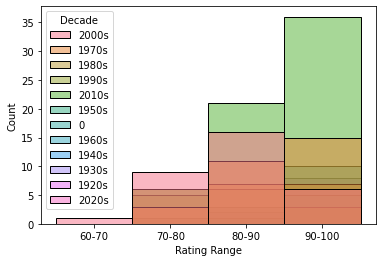

In [8]:
# Decades as a proportion of rating ranges

sns.histplot(data=df, x='Rating Range', hue='Decade')

# higher ratings occur more frequently in recent decades

<AxesSubplot:xlabel='Year', ylabel='Count'>

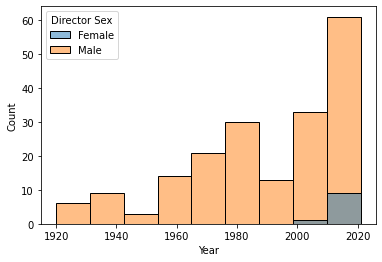

In [9]:
# Clarity on Director Sex needed

df['Director Sex'] = np.where(df['Sex'] == 'Woman', 'Female', 'Male')
df.head()

# display updated DataFrame
df.head()

sns.histplot(data=df, x='Year', hue='Director Sex')

# Female Directors only appearing in recent years

<AxesSubplot:xlabel='Year', ylabel='Ratings'>

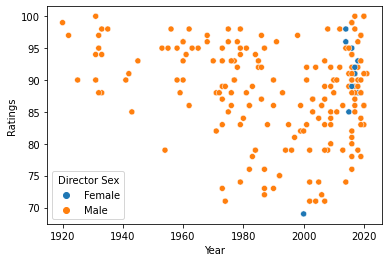

In [10]:
# Looking at sex versus ratings over time

sns.scatterplot(data=df, x='Year', y='Ratings', hue = "Director Sex")

# Female directors appear to rate disproportinately higher

<AxesSubplot:xlabel='Director Sex', ylabel='Count'>

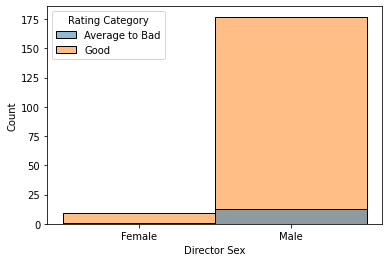

In [11]:
# Rating Category as a proportion of Sex

sns.histplot(data=df, x='Director Sex', hue='Rating Category')

# It still appears female directors have better ratings but the data is unclear

<AxesSubplot:xlabel='Director Sex'>

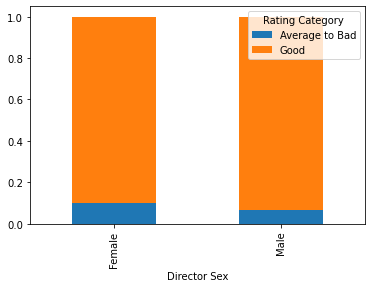

In [12]:
# We need to visualise the data differently to get a true idea

(df.groupby('Director Sex')['Rating Category'].value_counts(normalize=True)
   .unstack('Rating Category').plot.bar(stacked=True)
)

# as a proportion, female directors have slightly worse ratings, based on our divised categories

<AxesSubplot:xlabel='Director Sex'>

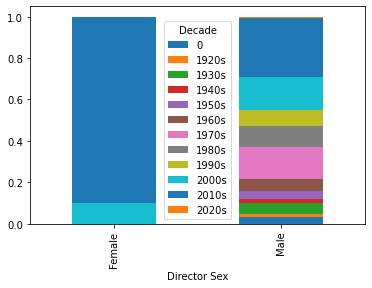

In [13]:
# We want to view out put per decade

(df.groupby('Director Sex')['Decade'].value_counts(normalize=True)
   .unstack('Decade').plot.bar(stacked=True)
)

# male directors have been active in the area for much longer

<AxesSubplot:xlabel='Year', ylabel='Ratings'>

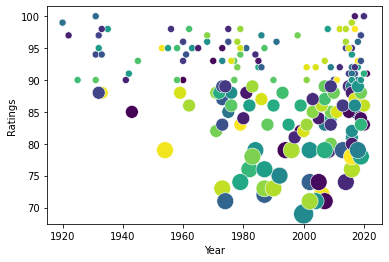

In [14]:
# create data for colour code
x = np.random.rand(200)

#Want weightable ratings range
# create a list of our conditions
conditions = [
    (df['Ratings'] >= 0) & (df['Ratings'] < 10),
    (df['Ratings'] >= 10) & (df['Ratings'] < 20),
    (df['Ratings'] >= 20) & (df['Ratings'] < 30),
    (df['Ratings'] >= 30) & (df['Ratings'] < 40),
    (df['Ratings'] >= 40) & (df['Ratings'] < 50),
    (df['Ratings'] >= 50) & (df['Ratings'] < 60),
    (df['Ratings'] >= 60) & (df['Ratings'] < 70),
    (df['Ratings'] >= 70) & (df['Ratings'] < 80),
    (df['Ratings'] >= 80) & (df['Ratings'] < 90),
    (df['Ratings'] >= 90)
    ]

# create a list of the values we want to assign for each condition
values = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Max Rating'] = np.select(conditions, values)

# display updated DataFrame
df.head()

#see ratings over time with new category for size reference
sns.scatterplot(data=df, x="Year", y="Ratings", size="Max Rating", c = x, legend=False, sizes=(50,400))
